## Prediction Simulation for Water Year 2019

We will be testing and evaluating the performance of the model over the 2019 WY at select locations

For example, the operational capacity of the model should begin at the beginning of the water year (WY week 1) with a previous SWE value of 0-in for each 1-km grid.
Model evaluation could then assess the forecasting skill on a hold-out dataset of an entire year in which known neighboring values do not control predictions, but rather driving to-date predictions from the predicted previous SWE values. 
Due to the high model performance, future work will target the assessment of model skill with an operational motivation

## Model Training/Testing influence on Model Results.

The model training/testing partitioning methodology has a strong influence on model performance and the goal of model evaluation.
The objective of the modeling effort was to examine the spatial extrapolation capacity of the model from selected monitoring stations to the overall region, best suited to a 75/25% training/testing split, respectively.
While it is critical to address the strong serial correlation in SWE accumulation and melt throughout the season, the high correlation between weeks has the potential to inflate model skill when using a 75/25% training/testing split due to the previous SWE feature being known.
An assessment of the operational capacity of the model is different than assessing the ability to extrapolate regional SWE from in-situ monitoring stations.
For example, the operational capacity of the model should begin at the beginning of the water year (WY week 1) with a previous SWE value of 0-in for each 1-km grid.
Model evaluation could then assess the forecasting skill on a hold-out dataset of an entire year in which known neighboring values do not control predictions, but rather driving to-date predictions from the predicted previous SWE values. 
Due to the high model performance, future work will target the assessment of model skill with an operational motivation.

In [2]:
import os
import pandas as pd
import warnings
import sys
sys.path.insert(0, '..')

from shared_scripts import Hindcast_Initialization, SSWEET, NSM_SCA

warnings.filterwarnings("ignore")

#Set working directories
cwd = os.getcwd() 
datapath = f"{os.path.expanduser('~')}/SWEML"

2024-02-27 08:29:41.224847: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2024-02-27 08:29:41.224888: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


In [3]:
#Get datetime and corresponding background information to evaluate hindcast
new_year = '2019'
threshold = '20.0'
Region_list = ['N_Sierras','S_Sierras_High', 'S_Sierras_Low']
model = 'LSTM'

datelist = Hindcast_Initialization.Hindcast_Initialization(cwd, datapath, new_year, threshold, Region_list)
EvalDF = Hindcast_Initialization.HindCast_DataProcess(datelist,Region_list,cwd, datapath, model)

Creating files for a historical simulation within  'N_Sierras', 'S_Sierras_High', 'S_Sierras_Low'  regions for water year  2019
New simulation start files complete


## Run your SSM in hindcast mode to evaluate operational capacity.



In [4]:
#run the model through all time (data acqusition already completed)
for day in datelist:
    print('Updating SWE predictions for ', day)
    #connect interactive script to Wasatch Snow module
    #Snow = NSM_SCA.NSM_SCA(cwd, datapath, day, threshold=threshold, Regions = Region_list)
    Snow = NSM_SCA.NSM_SCA(day, threshold=threshold, Regions = Region_list)
    
    #Go get SNOTEL observations - all data currently loaded, set to True to download
    #Snow.Get_Monitoring_Data_Threaded(getdata = False)

    #Initialize/Download the granules, all data preprocessed for the SSM activity, change to True to use the functions.
    #Snow.initializeGranules(getdata = False)

    #Process observations into Model prediction ready format,
    #Snow.Data_Processing()

    #Agument with SCA
    #Snow.augmentPredictionDFs()

    #Make predictions
    Snow.SWE_Predict()

Updating SWE predictions for  2018-10-02


AttributeError: 's3.ServiceResource' object has no attribute 'BUCKET'

In [6]:
from datetime import datetime
date = day
if type(date) != datetime:
    date = datetime.strptime(date, "%Y-%m-%d") 

In [7]:
date

datetime.datetime(2018, 10, 2, 0, 0)

processing predictions into geodataframe


100%|██████████| 39/39 [00:01<00:00, 19.60it/s]


creating figures for each prediction timestep


100%|██████████| 39/39 [00:42<00:00,  1.09s/it]


Figures complete, creating .gif image


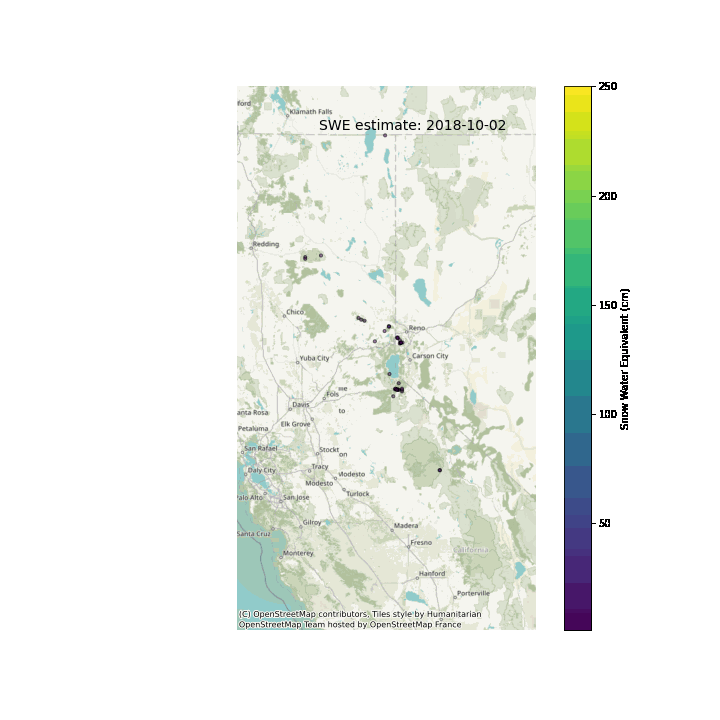

In [4]:
Hindcast_Initialization.Snowgif(cwd, datelist, Region_list)

### Model Hindcast complete

Lets see how your model performs within SSWEET in the [Hindcast_Evaluation](./Hindcast_Evaluation.ipynb) notebook.